In [2]:
from google.colab import drive
from IPython.display import Image
from pathlib import Path
from fastai.vision.all import *

drive.mount('/content/drive/')

!unzip -qq drive/MyDrive/emlyon/genre_classification/images_original.zip

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
path = Path('images_original')
fns = get_image_files(path)
fns

(#999) [Path('images_original/disco/disco00011.png'),Path('images_original/disco/disco00001.png'),Path('images_original/disco/disco00057.png'),Path('images_original/disco/disco00070.png'),Path('images_original/disco/disco00089.png'),Path('images_original/disco/disco00085.png'),Path('images_original/disco/disco00086.png'),Path('images_original/disco/disco00052.png'),Path('images_original/disco/disco00069.png'),Path('images_original/disco/disco00003.png')...]

In [23]:
spectrograms = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [24]:
spectrograms.summary(path)

Setting-up type transforms pipelines
Found 999 items
2 datasets of sizes 800,199
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      images_original/hiphop/hiphop00092.png
    applying PILBase.create gives
      PILImage mode=RGB size=432x288
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      images_original/hiphop/hiphop00092.png
    applying parent_label gives
      hiphop
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(4)

Final sample: (PILImage mode=RGB size=432x288, TensorCategory(4))


Found 999 items
2 datasets of sizes 800,199
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -- {'size': (12

In [25]:
dls = spectrograms.dataloaders(path)

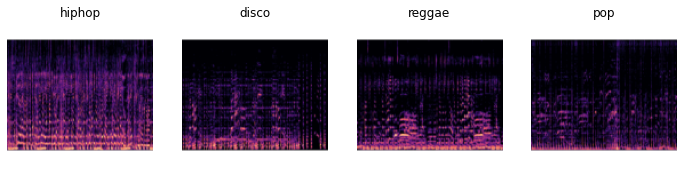

In [26]:
dls.valid.show_batch(max_n=4, nrows=1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0012022644514217973)

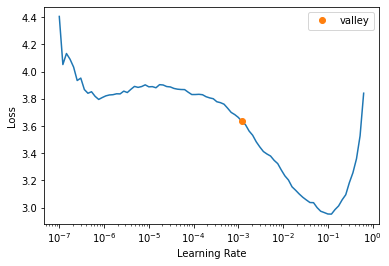

In [27]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [33]:
learn.fine_tune(4, 1.2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.265959,1.398553,0.437186,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.258512,1.351087,0.412060,00:04
1,1.153268,1.336280,0.371859,00:04
2,1.053948,1.295879,0.341709,00:06
3,0.953823,1.256982,0.366834,00:05


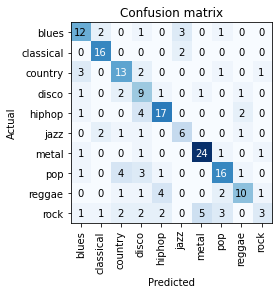

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [35]:
learn.export()